In [10]:
# Introduction
# This Jupyter Notebook analyzes NOAA temperature data near Ann Arbor, Michigan. We aim to visualize record high and low temperatures from 2005-2014 and highlight any 2015 data points that broke these records. We will also map the data stations and summarize the 2015 temperature trends

#Q1. Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.


#Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the datasets
# Load the temperature data and bin size data 
temp = pd.read_csv('temperature.csv')
binsize = pd.read_csv('BinSize.csv')


#Data Exploration
# Display the first few rows of the dataset to understand its structure
print(temp.head())
print(binsize.head())


            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106
            ID  LATITUDE  LONGITUDE  ELEVATION STATE                 NAME  \
0  AE000041196    25.333     55.517       34.0   NaN  SHARJAH INTER. AIRP   
1  AEM00041194    25.255     55.364       10.4   NaN           DUBAI INTL   
2  AEM00041217    24.433     54.651       26.8   NaN       ABU DHABI INTL   
3  AEM00041218    24.262     55.609      264.9   NaN          AL AIN INTL   
4  AFM00040990    31.500     65.850     1010.0   NaN     KANDAHAR AIRPORT   

  GSNFLAG HCNFLAG    WMOID             x             y  \
0     GSN     NaN  41196.0  5.579578e+06  2.816905e+06   
1     NaN     NaN  41194.0  5.567782e+06  2.808232e+06   
2     NaN     NaN  41217.0  5.532707e+06  2.716829e+06   
3     NaN     NaN  4121

In [11]:
#Q3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization. 


# Convert date to datetime format
temp['Date'] = pd.to_datetime(temp['Date'])

# Filter out leap days
temp = temp[~((temp['Date'].dt.month == 2) & (temp['Date'].dt.day == 29))]

# Handle missing values, if any
temp = temp.dropna()


In [12]:
print(temp.head())


            ID       Date Element  Data_Value
0  USW00094889 2014-11-12    TMAX          22
1  USC00208972 2009-04-29    TMIN          56
2  USC00200032 2008-05-26    TMAX         278
3  USC00205563 2005-11-11    TMAX         139
4  USC00200230 2014-02-27    TMAX        -106


In [13]:
# Filter data from 2005 to 2014
temp['year'] = temp['Date'].dt.year
temp['day_of_year'] = temp['Date'].dt.strftime('%m-%d')
df_2005_2014 = temp[(temp['year'] >= 2005) & (temp['year'] <= 2014)]

# Calculate record highs and lows for each day
record_highs = df_2005_2014[df_2005_2014['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
record_lows = df_2005_2014[df_2005_2014['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()


In [14]:
# Filter data for 2015
df_2015 = temp[temp['year'] == 2015]

# Identify record-breaking highs and lows in 2015
break_highs = df_2015[(df_2015['Element'] == 'TMAX') & (df_2015['Data_Value'] > record_highs[df_2015['day_of_year']].values)]
break_lows = df_2015[(df_2015['Element'] == 'TMIN') & (df_2015['Data_Value'] < record_lows[df_2015['day_of_year']].values)]


In [15]:
!pip install geopandas==0.9.0



In [16]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


C:\Users\MidhunKannezhath\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


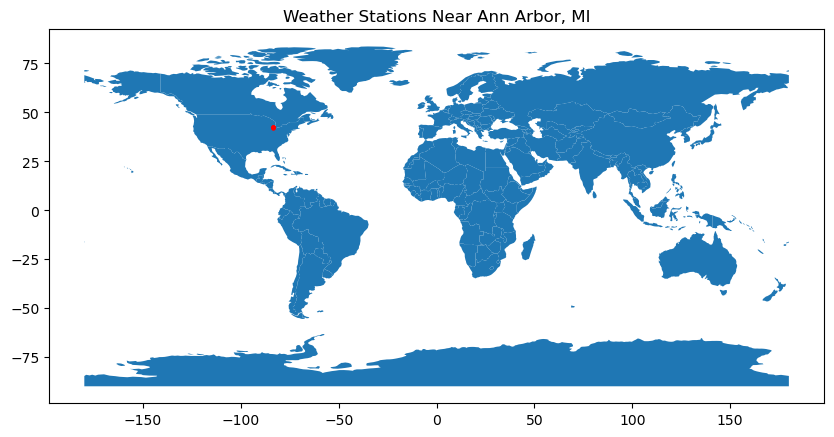

In [17]:
#Q5. The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data. 


import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Load the station locations
stations_df = pd.read_csv('BinSize.csv')  # assuming we have station coordinates in this file

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(stations_df, geometry=gpd.points_from_xy(stations_df.LONGITUDE, stations_df.LATITUDE))

# Filter stations near Ann Arbor, MI
ann_arbor_coords = (-83.7430, 42.2808)  # approximate coordinates for Ann Arbor
gdf['distance'] = gdf['geometry'].apply(lambda x: x.distance(gpd.GeoSeries([gpd.points_from_xy([ann_arbor_coords[0]], [ann_arbor_coords[1]])[0]])[0]))
near_ann_arbor = gdf[gdf['distance'] < 0.1]  # within 0.1 degrees (~11 km)

# Plot map
world = gpd.read_file('ne_110m_admin_0_countries.shp')
ax = world.plot(figsize=(10, 10))
near_ann_arbor.plot(ax=ax, color='red', markersize=5)
plt.title('Weather Stations Near Ann Arbor, MI')
plt.show()


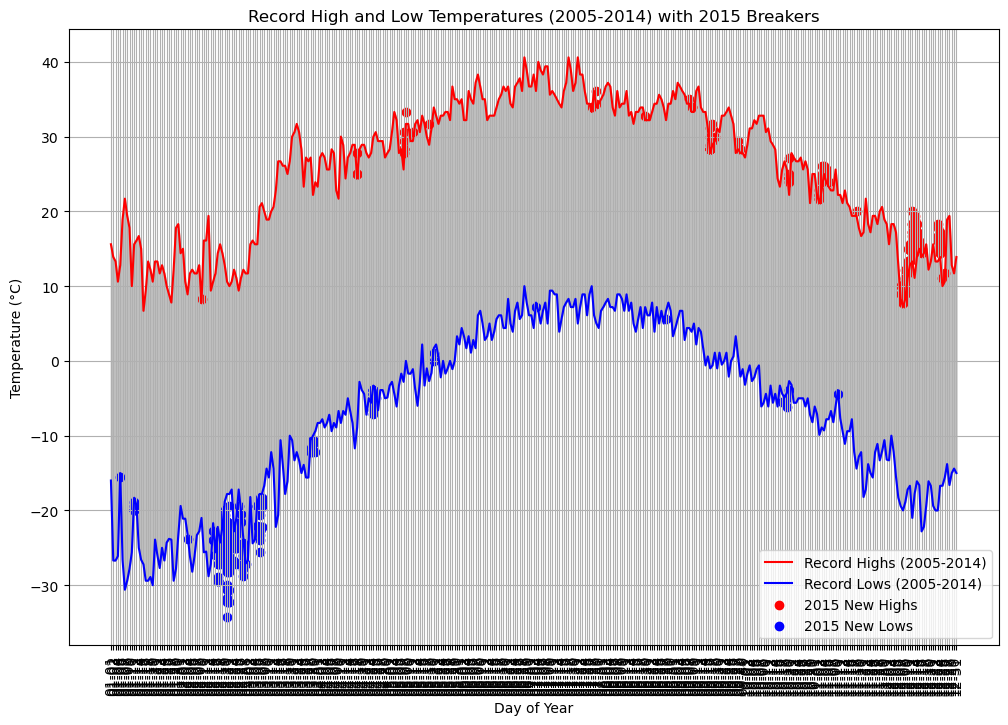

In [18]:
plt.figure(figsize=(12, 8))


#Q2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
#Q6. Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015)

# Plot record highs and lows
plt.plot(record_highs.index, record_highs.values / 10, 'r-', label='Record Highs (2005-2014)')
plt.plot(record_lows.index, record_lows.values / 10, 'b-', label='Record Lows (2005-2014)')

# Shade the area between record highs and lows
plt.fill_between(record_highs.index, record_highs.values / 10, record_lows.values / 10, color='gray', alpha=0.5)

# Overlay record-breaking points from 2015
plt.scatter(break_highs['day_of_year'], break_highs['Data_Value'] / 10, c='red', label='2015 New Highs')
plt.scatter(break_lows['day_of_year'], break_lows['Data_Value'] / 10, c='blue', label='2015 New Lows')


#Q4. Consider issues such as legends, labels, and chart junk.


# Add labels and legend
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Breakers')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
